# How to...

In [ ]:
import pandas as pd


## ...check the version of pandas?

In [ ]:
print(pd.__version__)

1.5.3


## ...construct a dataframe with a dictionary?

[pandas doc on the DataFrame constructor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

In [ ]:
# Using a DataFrame constructor
df = pd.DataFrame({'Dates': ['2/22/2024', '2/29/2024', '1/1/2000'], 'Events': ['This is today', 'Additional day on a leap year', 'Y2K']})

In [ ]:
df

,Dates,Events
0,2/22/2024,This is today
1,2/29/2024,Additional day on a leap year
2,1/1/2000,Y2K


## ...split the string values of one column and assign to new columns?

In this example, the strings in the "Dates" column is split by the "/" separator into a list of values that are then assigned to three different columns: "Month", "Day", and "Year."

[Applying string methods to text values in dataframe columns](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods)

[Python built-in `split` function](https://docs.python.org/3/library/stdtypes.html#str.split)

In [ ]:
df[['Month', 'Day', 'Year']] = df['Dates'].str.split('/', expand=True)

In [ ]:
df

,Dates,Events,Month,Day,Year
0,2/22/2024,This is today,2,22,2024
1,2/29/2024,Additional day on a leap year,2,29,2024
2,1/1/2000,Y2K,1,1,2000


## ...check the type of data in a column?
- `dtype('O')` are objects, which are Python strings.
- `dtype('int64')` are integers.
- `dtype('float64')` are floating-point numbers.


In [ ]:
df['Year'].dtypes

dtype('O')

## ...change the type of data in one column?

In [ ]:
df['Year'] = pd.to_numeric(df['Year'])

In [ ]:
df['Year'].dtypes

dtype('int64')

## ...change the type of data in multiple columns at once?

In [ ]:
# From objects...
print(df['Day'].dtypes, df['Month'].dtypes)

object object


In [ ]:
# ...to integers.
df[['Day', 'Month']] = df[['Day', 'Month']].apply(pd.to_numeric, errors='coerce', axis=1)
print(df['Day'].dtypes, df['Month'].dtypes)

int64 int64


## ...do math operations on column values?
Some useful operations:
- Add: [`add()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.add.html)
- Subtract: [`sub()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sub.html)
- Multiply: [`mul()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html)
- Divide: [`div()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.div.html)

See example usage below:

In [ ]:
# This multiplies all values in the 'Month' column with all values in the 'Day' column
# and assigns the results to a new column, 'Day_of_Year'
df['Day_of_Year'] = df['Month'].mul(df['Day'])

In [ ]:
## This divides all values in one column by a number
# and assigns the values to a new column.

In [ ]:
df['Proportion_of_Year'] = df['Day_of_Year'].div(365)

In [ ]:
df

,Dates,Events,Month,Day,Year,Day_of_Year,Proportion_of_Year
0,2/22/2024,This is today,2,22,2024,44,0.120548
1,2/29/2024,Additional day on a leap year,2,29,2024,58,0.158904
2,1/1/2000,Y2K,1,1,2000,1,0.002740


## ...read data from an external source into pandas?

In [ ]:
# Import the urlretrieve function
from urllib.request import urlretrieve

# Save the web address (url) in a python string
dataset_url = 'https://data.chhs.ca.gov/dataset/03e61434-7db8-4a53-a3e2-1d4d36d6848d/resource/75019f89-b349-4d5e-825d-8b5960fc028c/download/odp_idb_2001_2022_ddg_compliant.csv'

# Set the name of the file where we want to save the data
data_file_name = 'ca_id.csv'

# Download the data
urlretrieve(dataset_url, data_file_name)

# Load the text version of the table (a csv file) into python using pandas
feature_table = pd.read_csv(data_file_name)

## ...use `seaborn` to plot data?

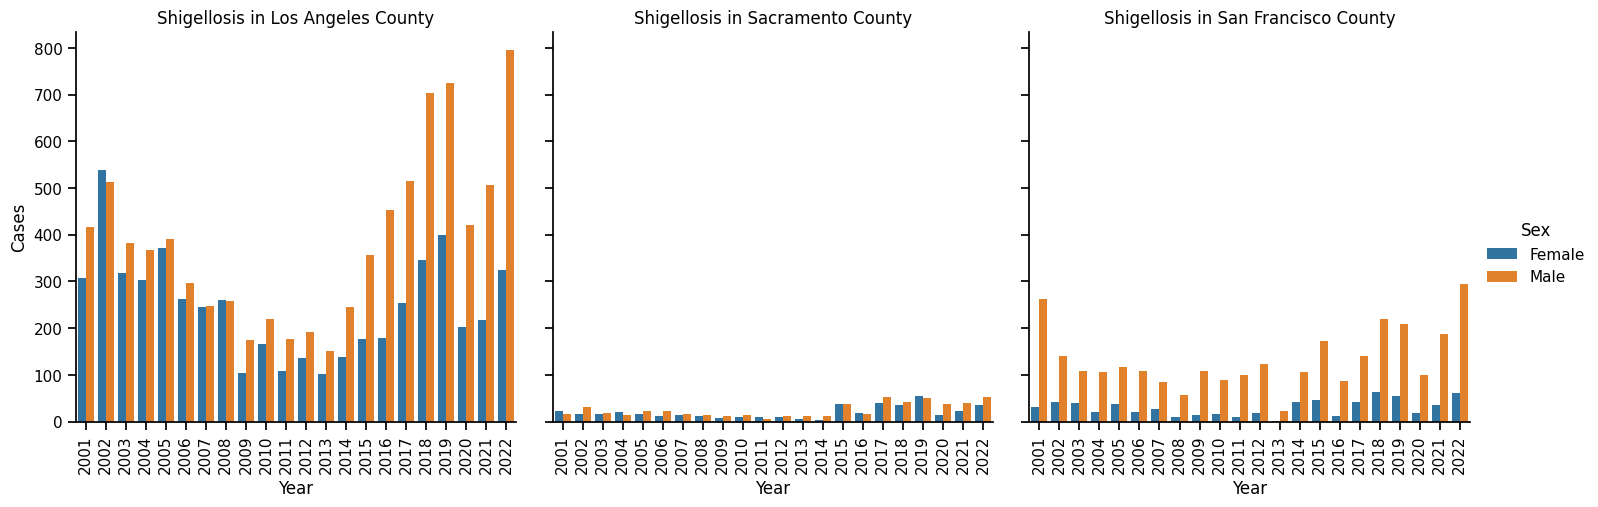

In [ ]:
%matplotlib inline
# Import seaborn
import seaborn as sns

# Apply a theme
sns.set_context("notebook", font_scale=1.0)

# Select the data that I'm interested in
shigellosis = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') &
                             ((feature_table['County'] == 'San Francisco') |
                              (feature_table['County'] == 'Los Angeles') |
                              (feature_table['County'] == 'Sacramento')) &
                             (feature_table['Sex'] != 'Total')]

ax = sns.catplot(kind='bar', data=shigellosis, x='Year', y='Cases', hue='Sex', col='County')
# Rotate labels
ax.tick_params(axis='x', rotation=90)
ax.set_titles("Shigellosis in {col_name} {col_var}")